In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import cryptoz
from cryptoz import stats
import pandas as pd
import numpy as np

# data

In [2]:
from_dt = cryptoz.data.ago_dt(days=3)
to_dt = cryptoz.data.now_dt()
period = cryptoz.data.Period.M5

In [3]:
ohlc = cryptoz.data.chartdata('(USDT_+)', from_dt, to_dt, period)

In [4]:
reload(cryptoz.plot)
df = cryptoz.utils.to_df(ohlc, 'C').resample('1h').last()

   count         mean          std     min        25%       50%         75%  \
0  876.0  1215.533504  3038.990759  0.0881  19.706764  144.5619  544.485117   

       max  
0  11733.0  


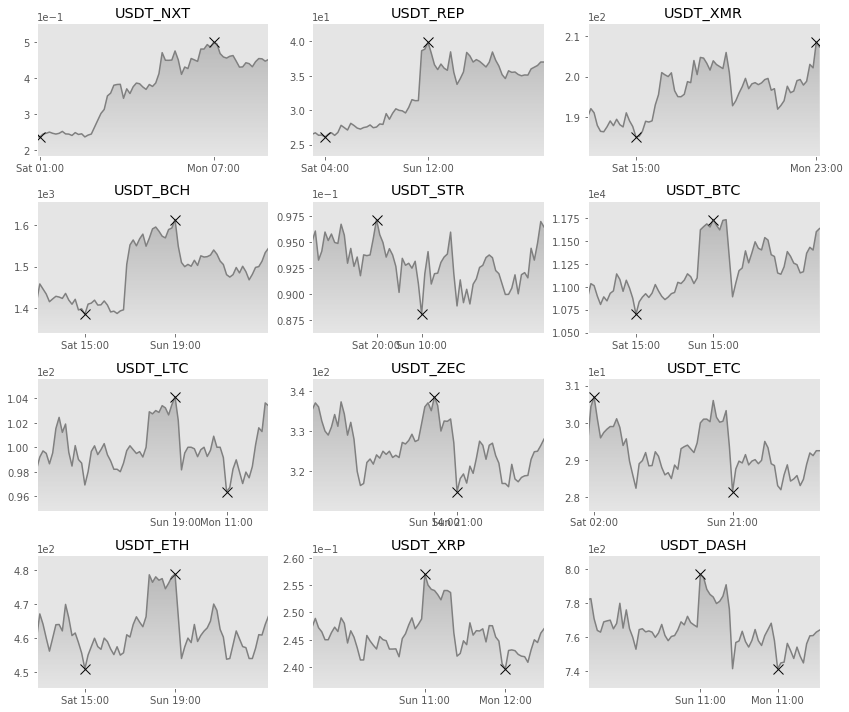

In [5]:
ranker = lambda sr: 1 - sr.iloc[-1] / sr.min()
cryptoz.plot.time_series(df, ranker=ranker)

In [6]:
df = cryptoz.utils.to_df(ohlc, 'C').pct_change().fillna(0)

     count      mean       std       min       25%  50%       75%       max
0  10368.0  0.000174  0.007143 -0.072595 -0.002554  0.0  0.003024  0.093333


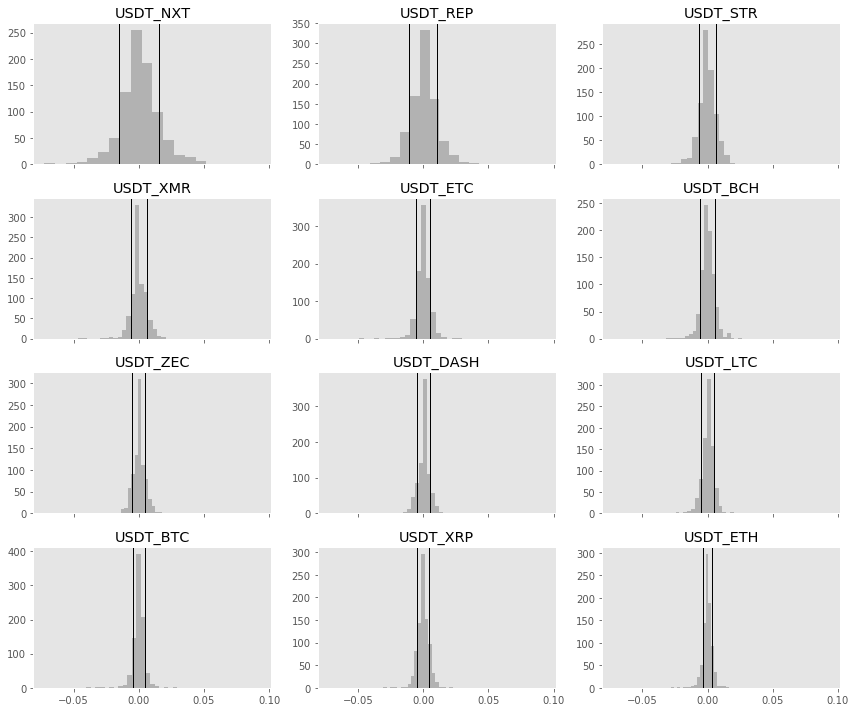

In [7]:
ranker = lambda sr: 1 / sr.std()
axvlines = [lambda sr: -sr.std(), lambda sr: sr.std()]
cryptoz.plot.hist(df, axvlines=axvlines, ranker=ranker)

# recovery

In [8]:
df = stats.recovery.dd(ohlc)

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,864.0,-0.049221,0.025573,-0.118972,-0.070373,-0.046967,-0.027538,-0.001908
USDT_BTC,864.0,-0.030756,0.019570,-0.116720,-0.042669,-0.028676,-0.014721,-0.001948
USDT_DASH,864.0,-0.043739,0.021532,-0.103714,-0.063502,-0.036418,-0.027413,-0.001247
USDT_ETC,864.0,-0.053963,0.022114,-0.109744,-0.069919,-0.057964,-0.036284,-0.002368
USDT_ETH,864.0,-0.033340,0.017675,-0.088915,-0.047215,-0.032847,-0.016704,-0.000273
USDT_LTC,864.0,-0.043584,0.025507,-0.116541,-0.062359,-0.039553,-0.021133,-0.000992
USDT_NXT,864.0,-0.078593,0.045483,-0.222702,-0.108443,-0.075862,-0.039634,-0.002080
USDT_REP,864.0,-0.139499,0.109324,-0.310056,-0.245388,-0.186657,-0.028026,-0.000945
USDT_STR,864.0,-0.055829,0.022907,-0.124025,-0.073080,-0.056399,-0.041988,-0.005920
USDT_XMR,864.0,-0.037927,0.017453,-0.109039,-0.049785,-0.038140,-0.024165,0.000000


In [9]:
stats.recovery.dd_now(ohlc)

USDT_REP    -0.226427
USDT_NXT    -0.112379
USDT_DASH   -0.055393
USDT_ETC    -0.053092
USDT_BCH    -0.049785
USDT_XRP    -0.049222
USDT_ZEC    -0.038123
USDT_ETH    -0.034106
USDT_LTC    -0.028216
USDT_BTC    -0.018008
USDT_STR    -0.017173
USDT_XMR    -0.011063
dtype: float64

   count      mean       std       min       25%       50%       75%       max
0  876.0 -0.053988  0.048354 -0.298496 -0.065177 -0.043555 -0.025657 -0.004713


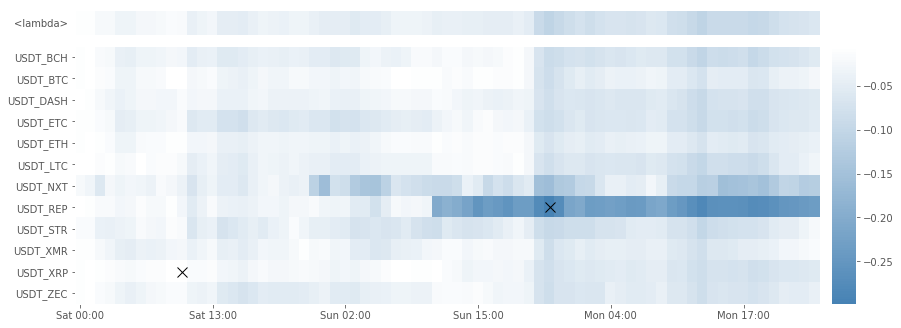

In [10]:
df = stats.recovery.resample_dd(ohlc, lambda df: df.mean(), '1h')

cmap = cryptoz.plot.continuous_cmap(['steelblue', 'white'])
cryptoz.plot.evolution(df, cmap=cmap)

In [11]:
stats.recovery.maxdd_duration(ohlc)

USDT_NXT    0 days 01:00:00
USDT_XMR    0 days 01:40:00
USDT_BTC    0 days 01:45:00
USDT_ETC    0 days 05:50:00
USDT_ZEC    0 days 09:25:00
USDT_ETH    0 days 10:00:00
USDT_DASH   0 days 10:05:00
USDT_XRP    0 days 10:05:00
USDT_REP    0 days 11:05:00
USDT_BCH    0 days 16:45:00
USDT_LTC    0 days 17:00:00
USDT_STR    1 days 01:05:00
dtype: timedelta64[ns]

In [12]:
df = cryptoz.utils.to_df(stats.recovery.details(ohlc), 'dd_len')

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,12.0,34.833333,67.612308,1.0,1.0,3.5,18.25,201.0
USDT_BTC,13.0,11.692308,17.031268,1.0,1.0,2.0,21.00,54.0
USDT_DASH,5.0,57.000000,75.934182,1.0,3.0,3.0,121.00,157.0
USDT_ETC,6.0,36.666667,56.429307,1.0,3.0,4.0,53.75,138.0
USDT_ETH,11.0,19.272727,37.325838,1.0,1.0,1.0,16.00,120.0
USDT_LTC,11.0,30.909091,60.107328,1.0,2.0,10.0,20.50,204.0
USDT_NXT,23.0,12.173913,28.453554,1.0,1.0,2.0,10.00,137.0
USDT_REP,20.0,12.700000,29.914088,1.0,1.0,1.5,7.50,133.0
USDT_STR,11.0,32.636364,89.164200,1.0,2.0,4.0,11.50,301.0
USDT_XMR,9.0,29.333333,50.373604,1.0,1.0,2.0,28.00,154.0


# corr

   count      mean       std       min       25%       50%       75%  max
0  144.0  0.496904  0.387702 -0.459603  0.272396  0.597703  0.817284  1.0


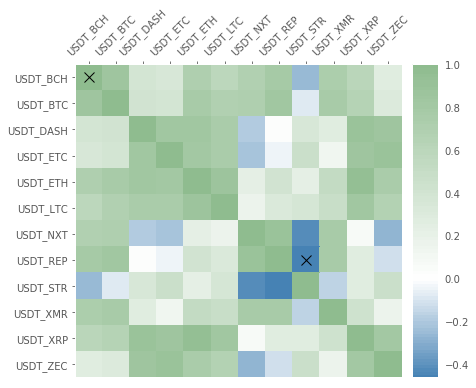

In [13]:
df = stats.corr.corr(cryptoz.utils.to_df(ohlc, 'C'))

cmap = cryptoz.plot.continuous_cmap(['steelblue', 'white', 'darkseagreen'])
norm = cryptoz.plot.midpoint_norm(0)
cryptoz.plot.matrix(df, cmap=cmap, norm=norm)

   count      mean       std       min       25%       50%       75%       max
0  720.0  0.439946  0.415041 -0.793081  0.172293  0.519855  0.787528  0.993005


/Users/olegpolakow/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


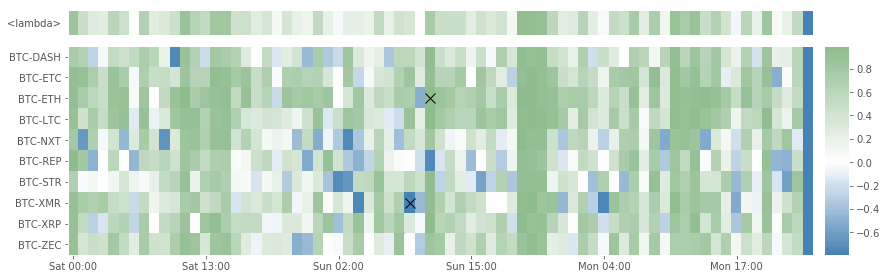

In [14]:
import re

df = cryptoz.utils.to_df(ohlc, 'C')
df = stats.corr.resample_corr(df, '1h')
regex = re.compile('(USDT_BTC-+)')
df = df[list(filter(regex.search, df.columns))]
df.columns = list(map(lambda x: re.sub(r'(USDT_)', '', x), df.columns))

cryptoz.plot.evolution(df, cmap=cmap, norm=norm)

# depth

In [15]:
orderbooks = cryptoz.data.orderbooks('(USDT_+)')

    count         mean            std            min            25%  \
0  2400.0 -8894.473154  144965.126794 -457780.710456 -115137.004543   

         50%          75%            max  
0 -16.414142  94558.45245  253896.415068  


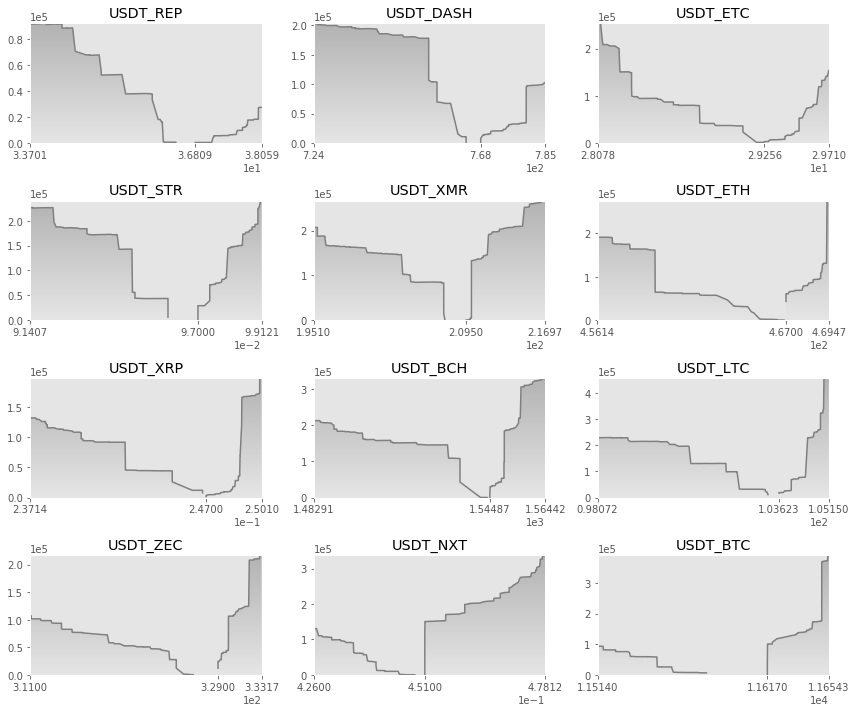

In [16]:
cryptoz.plot.depth(orderbooks, ranker=lambda sr: 1 - sr.max() / abs(sr.min()))

# score

In [17]:
def BB_bands(sr, window, std_n):
    rollmean_sr = sr.rolling(window=window, min_periods=1).mean()
    rollstd_sr = sr.rolling(window=window, min_periods=1).std()
    upper_band_sr = rollmean_sr + std_n * rollstd_sr
    lower_band_sr = rollmean_sr - std_n * rollstd_sr
    return upper_band_sr, lower_band_sr

def corridor(sr1, sr2):
    return sr1 - sr2

def normalize(sr):
    return (sr - sr.mean()) / sr.std()

   count      mean      std   min       25%      50%       75%   max
0  756.0  0.005528  9.16153 -12.0 -9.822265  0.02338  9.826666  12.0


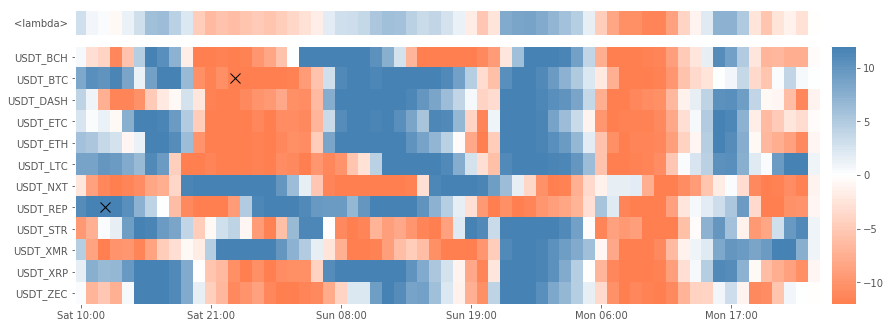

In [18]:
window = 120
std_n = 3

strategy = lambda ohlc_df: normalize(corridor(*BB_bands(ohlc_df['C'], window, 3)))
df1 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score1_df = cryptoz.score.rolling_apply(df1, window=window, min_periods=window)
score1_df.dropna(inplace=True)

cmap = cryptoz.plot.continuous_cmap(['coral', 'white', 'steelblue'])
norm = cryptoz.plot.midpoint_norm(0)
cryptoz.plot.evolution(score1_df.resample('1h').sum(), cmap=cmap, norm=norm)

   count      mean       std        min       25%       50%       75%  \
0  756.0  1.337145  6.478535 -11.735495 -3.974692  1.766815  6.984963   

         max  
0  11.784201  


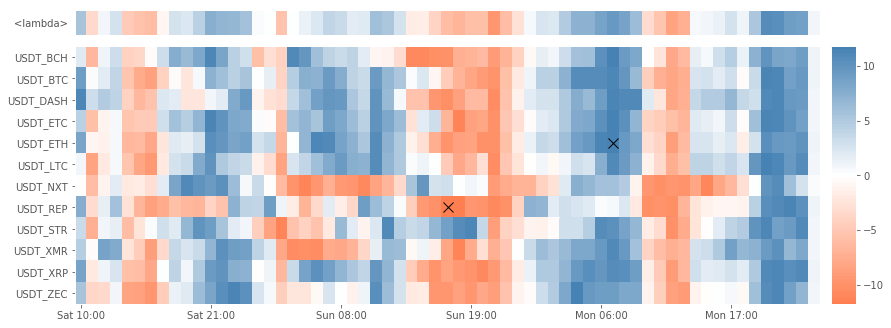

In [19]:
strategy = lambda ohlc_df: normalize(corridor(ohlc_df['C'], ohlc_df['C'].rolling(window=window, min_periods=1).mean()))
df2 = pd.DataFrame({pair: strategy(ohlc_df) for pair, ohlc_df in ohlc.items()})
score2_df = cryptoz.score.rolling_apply(df2, window=window, min_periods=window)
score2_df.dropna(inplace=True)

cryptoz.plot.evolution(score2_df.resample('1h').sum(), cmap=cmap, norm=norm)

Rules
1. narrow corridor and price over MA -> trend up -> buy
2. wide corridor and price below MA -> oversold -> buy
3. narrow corridor and price below MA -> trend down -> sell
4. wide corridor and price above MA -> overbought -> sell

   count      mean       std        min       25%       50%       75%  \
0  756.0 -2.286754  5.947204 -11.542823 -7.238928 -3.300216  2.104698   

         max  
0  11.600157  


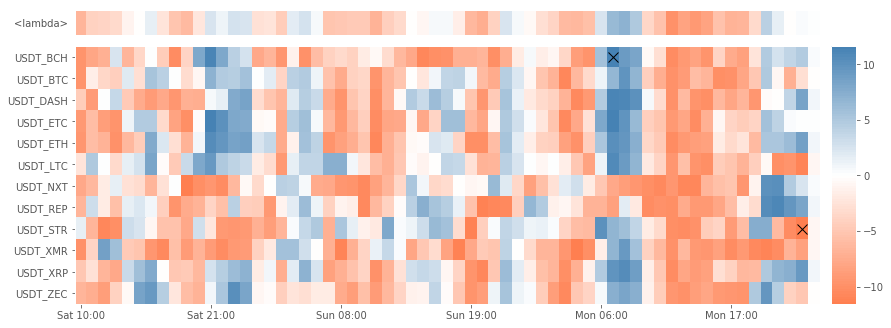

In [20]:
score_df = cryptoz.score.diff(score1_df, score2_df, axis=0) # axis 0: pair-local score
score_df.dropna(inplace=True)

cryptoz.plot.evolution(score_df.resample('1h').sum(), cmap=cmap, norm=norm)

# perf

   count      mean       std  min       25%       50%       75%  max
0  192.0 -0.394259  0.689018 -1.0 -0.931795 -0.734669 -0.066807  1.0


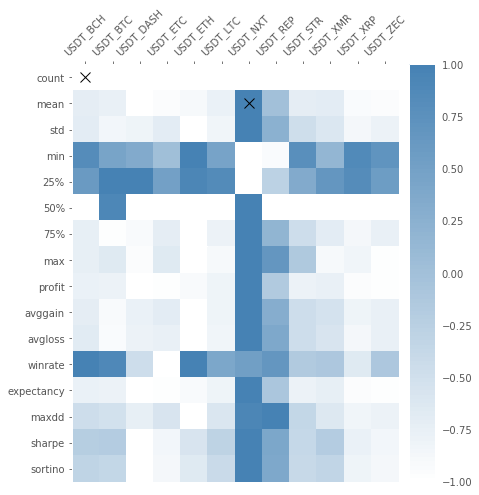

In [21]:
df = stats.perf.score_matrix(ohlc)

cmap = cryptoz.plot.continuous_cmap(['white', 'steelblue'])
cryptoz.plot.matrix(df, cmap=cmap)